Data Analysis

Import the necessary libraries

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the cleaned data

In [305]:
df = pd.read_csv("seria_cleaned.csv")

Question 1: Which player has the highest ratio of successful dribbles to dribble attempts among those who have attempted at least 50 dribbles?

In [306]:
# Filter for players with at least 50 dribble attempts
dribblers = df[df['dribble_attempts'] >= 50].copy()
# Calculate the dribble success ratio
dribblers['dribble_success_ratio'] = dribblers['successful_dribbles'] / dribblers['dribble_attempts']
# Find the player with the highest ratio
#best_dribbler = dribblers.sort_values(by='dribble_success_ratio', ascending=False).iloc[0]
#print(f"The player with the highest successful dribble ratio (attempting >= 50 dribbles) is {best_dribbler['player']} from {best_dribbler['team']} with a ratio of {best_dribbler['dribble_success_ratio']:.2f}.")

Question 2: Can you identify the top 5 players with the most goal-creating actions relative to their total minutes played?

In [307]:
# Calculate goal-creating actions per minute
df["gca_per_minute"] = df["goal_creating_actions"] / df["minutes"]
# Handle potential division by zero
df["gca_per_minute"] = df["gca_per_minute"].fillna(0)
# Get the top 5 players, ensuring we sort the non-zero minutes played
top_5_gca = df[df["minutes"] > 0].sort_values(by="gca_per_minute",ascending=False).head(5)
print("Top 5 players with the most goal-creating actions relative to minutes played")
print(top_5_gca[["player","team","minutes","goal_creating_actions","gca_per_minute"]].to_string(index=False))

Top 5 players with the most goal-creating actions relative to minutes played
           player          team  minutes  goal_creating_actions  gca_per_minute
      David Neres        Napoli        3                      2        0.666667
 Mathis Lambourde Hellas Verona        3                      1        0.333333
   Manuel Lazzari         Lazio        4                      1        0.250000
  Luca Mazzitelli          Como        6                      1        0.166667
Dailon Livramento Hellas Verona       13                      2        0.153846


Question 3: What is the average age of players who have scored at least 5 goals, and how does this compare to the average age of players who have not scored any goals

Average age of players with at least 5 goals: nan years
Average age of players with 0 goals: 26.11 years
Players who have scored at least 5 goals are, on average, younger by nan years


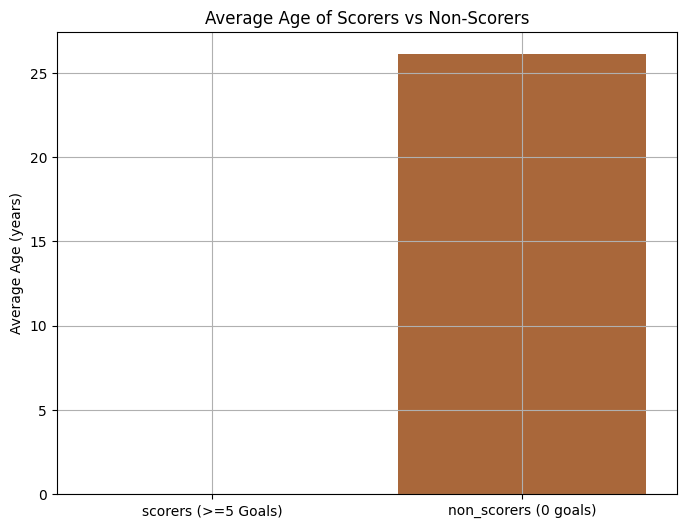

In [308]:
# Group players by goals scored
scorers = df[df["goals"] > 5]
non_scorers = df[df["goals"] == 0]
# Calculate the average age of each group 
avg_age_scorers = scorers["age"].mean()
avg_age_non_scorers = non_scorers["age"].mean()
print(f"Average age of players with at least 5 goals: {avg_age_scorers:.2f} years")
print(f"Average age of players with 0 goals: {avg_age_non_scorers:.2f} years")
print(f"Players who have scored at least 5 goals are, on average, {"older" if avg_age_scorers > avg_age_non_scorers else "younger"} by {abs(avg_age_scorers - avg_age_non_scorers):.2f} years")

# Plotting
# Create a bar chart for the age comparison
plt.figure(figsize=(8,6))
sns.barplot(x = ["scorers (>=5 Goals)","non_scorers (0 goals)"], y = [avg_age_scorers,avg_age_non_scorers],color="#BB6328")
plt.title("Average Age of Scorers vs Non-Scorers")
plt.ylabel("Average Age (years)")
plt.grid()
plt.show()

Question 4: How does the average expected goals (xG) per minute differ between players in the Forward position and those in the CM (Central Midfielder) position

Average xG per minute for Forwards (FW): 0.00498.
Average xG per minute for Central Midfielders (CM): 0.00192.


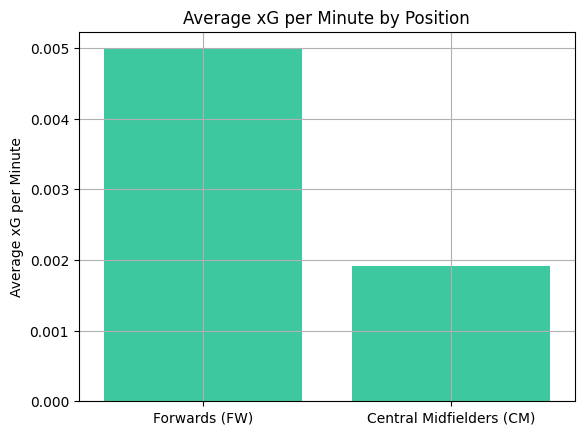

In [309]:
# Filter for FW and CM positions and ensure minutes > 0
fw_players = df[(df["position"].str.contains("FW")) & (df["minutes"] > 0)].copy()
cm_players = df[(df["position"].str.contains("CM")) & (df["minutes"])].copy()
# Calculate the xG per minutes for each group
avg_xg_per_min_fw = (fw_players["expected_goals_xg"] / fw_players["minutes"]).mean()
avg_xg_per_min_cm = (cm_players["expected_goals_xg"] / cm_players["minutes"]).mean()
print(f"Average xG per minute for Forwards (FW): {avg_xg_per_min_fw:.5f}.")
print(f"Average xG per minute for Central Midfielders (CM): {avg_xg_per_min_cm:.5f}.")

# Plotting
# Create a bar chart for xG per minute comparison
plt.Figure(figsize=(8,6))
sns.barplot(x=["Forwards (FW)","Central Midfielders (CM)"],y=[avg_xg_per_min_fw,avg_xg_per_min_cm],color="#27DFA8")
plt.grid()
plt.title("Average xG per Minute by Position")
plt.ylabel("Average xG per Minute")
plt.show()

Question 5: Which team has the highest average pass completion percentage

The team with the highest average pass completion percentage is Juventus with an average percentage of 85.02924123675157


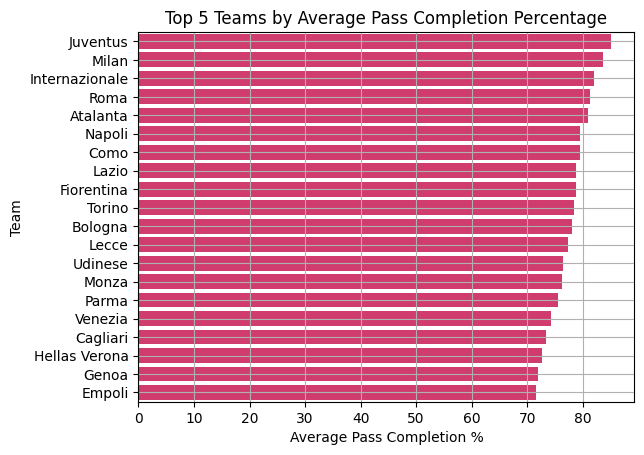

In [310]:
# Group by team and calculate the mean of pass completion percentage
avg_pass_completion_by_team = df.groupby("team")["pass_completed_%"].mean().sort_values(ascending=False)
best_team = avg_pass_completion_by_team.index[0]
best_percentage = avg_pass_completion_by_team.iloc[0]
print(f"The team with the highest average pass completion percentage is {best_team} with an average percentage of {best_percentage}")

# Plotting
# Create a bar chart for top 5 teams by pass completion percentage
sns.barplot(x=avg_pass_completion_by_team.values,y=avg_pass_completion_by_team.index,color="#E9236581")
plt.grid()
plt.title("Top 5 Teams by Average Pass Completion Percentage")
plt.xlabel("Average Pass Completion %")
plt.ylabel("Team")
plt.show()

Question 6: Are there any teams with particulary high number of yellow or red card relative to the total number of players they've used

In [311]:
# Group by team calculate total cards and number of players
team_card_stats = df.groupby("team").agg(
    total_cards = ("yellow_cards","sum"),
    total_players = ("player","nunique")
).reset_index()
# Calculate cards per player
team_card_stats["cards_per_player"] = team_card_stats["total_cards"] / team_card_stats["total_players"]
# Sort and print the top 5 teams
top_5_teams_cards = team_card_stats.sort_values(by="cards_per_player",ascending=False).head()
print("Top 5 teams with the highest cards per player ratio:")
print(top_5_teams_cards[["team","total_cards","total_players","cards_per_player"]].to_string(index=False))

Top 5 teams with the highest cards per player ratio:
         team  total_cards  total_players  cards_per_player
        Lazio           34             23          1.478261
        Monza           35             24          1.458333
Hellas Verona           38             27          1.407407
      Udinese           31             24          1.291667
       Torino           31             25          1.240000


Question 7: How many players have at least one yellow and one red red card

In [312]:
# Filter the DataFrame for players who have both types of cards
carded_players = df[(df["yellow_cards"] > 0) & (df["red_cards"] > 0)]
# Get the unique count of these players
count_carded_players = carded_players["player"].nunique()
print(f"There are {count_carded_players} unique players who have received at least one yelllow card and one red card")

There are 17 unique players who have received at least one yelllow card and one red card


Question 8: Is there a correlation between a team's total goals and the total shot-creating Actions ?

The correlation coefficient between a team's total goals and total shot-craeting actions is 0.63


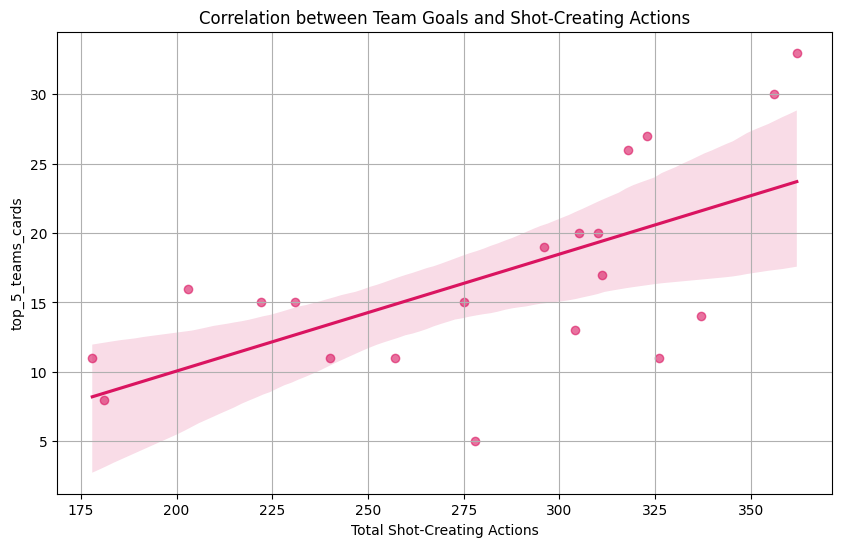

In [313]:
# Aggregrate data by team
team_stats = df.groupby("team").agg(
    total_goals = ("goals","sum"),
    total_sca = ("shot_creating_actions","sum")
).reset_index()

# Calculate the correlation coefficient
correlation = team_stats["total_goals"].corr(team_stats["total_sca"])
print(f"The correlation coefficient between a team's total goals and total shot-craeting actions is {correlation:.2f}")

# Plotting
plt.figure(figsize=(10,6))
sns.regplot(x="total_sca",y="total_goals",data=team_stats,scatter_kws={"alpha":0.6},color="#da146068")
plt.title("Correlation between Team Goals and Shot-Creating Actions")
plt.xlabel("Total Shot-Creating Actions")
plt.ylabel("top_5_teams_cards")
plt.grid(True)
plt.show()

Question 9: Which player has the largest difference between their actual goals and their expected goals (xG)?

The player with the largest positive difference (goals > xG) is Marcus Thuram from Internazionale with a difference of 2.40.
The player with the largest negative difference (goals < xG) is Valentín Castellanos from Lazio with a difference of -1.40.


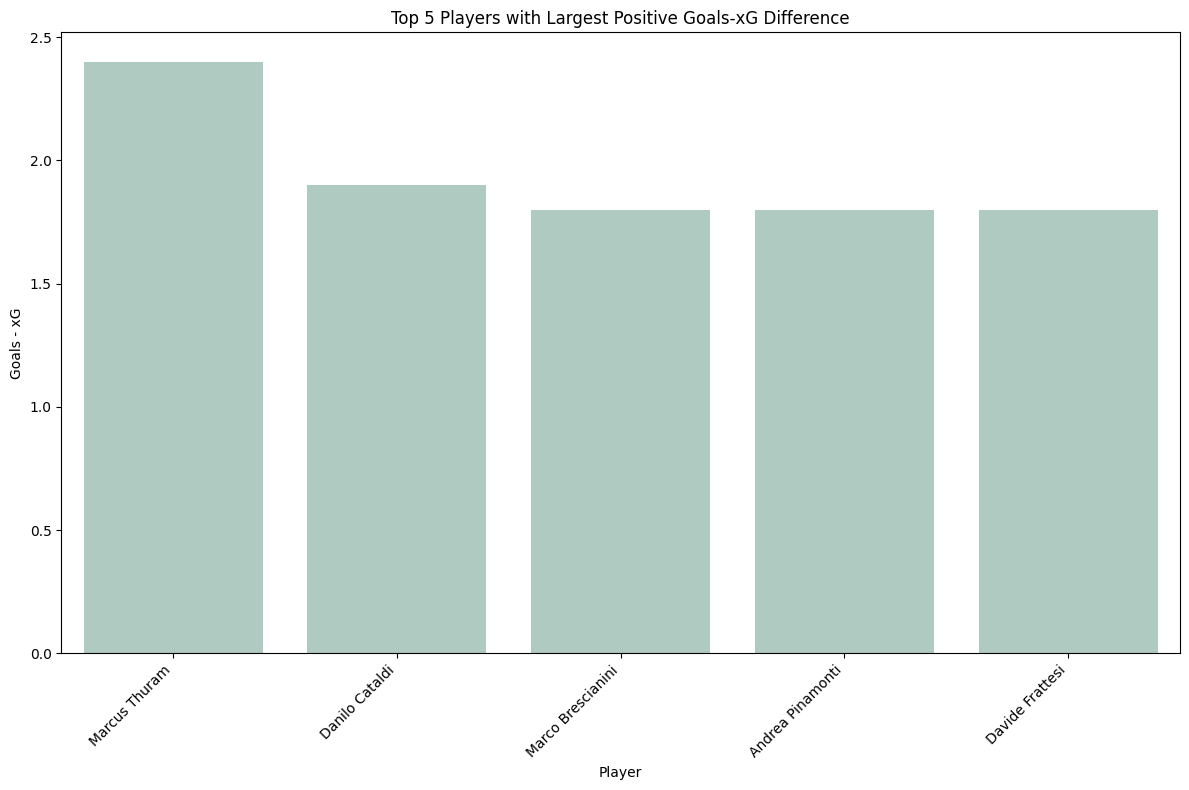

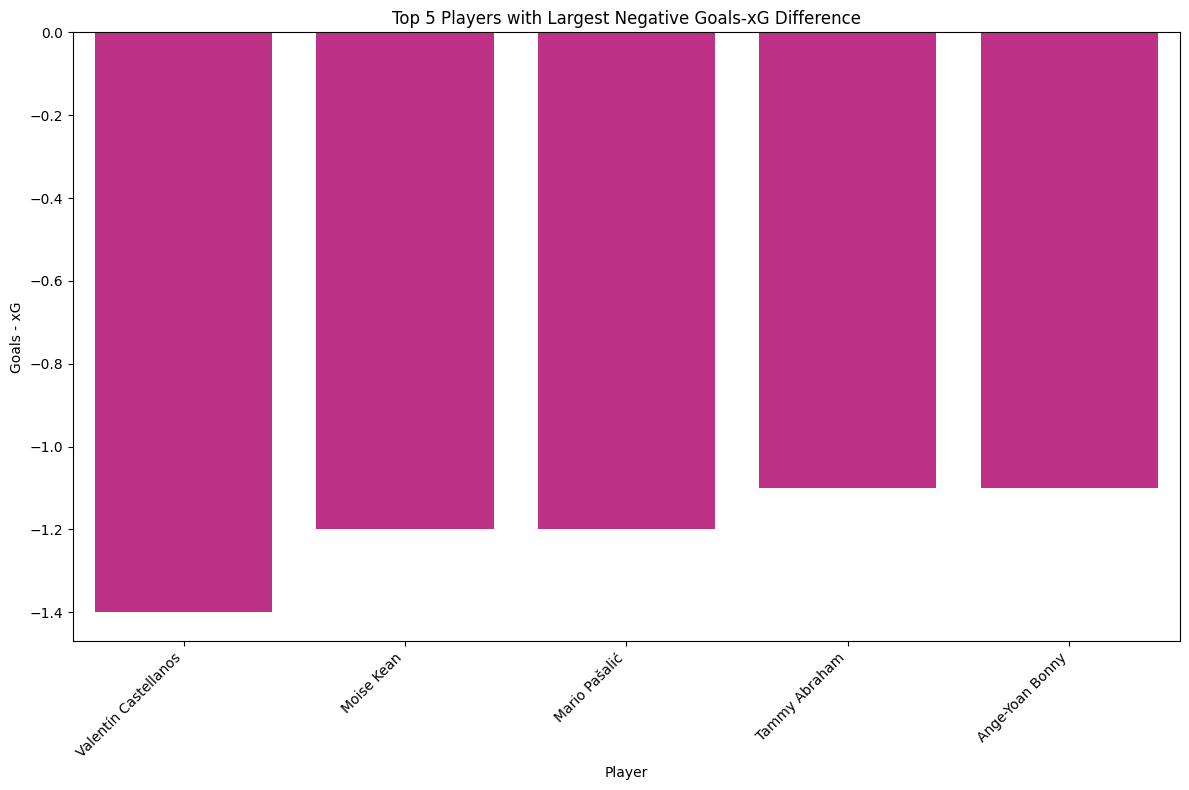

In [314]:
# Calculate the difference and find the max
df['goals_minus_xg'] = df['goals'] - df['expected_goals_xg']
best_performer = df.sort_values(by='goals_minus_xg', ascending=False).iloc[0]
worst_performer = df.sort_values(by='goals_minus_xg', ascending=True).iloc[0]
print(f"The player with the largest positive difference (goals > xG) is {best_performer['player']} from {best_performer['team']} with a difference of {best_performer['goals_minus_xg']:.2f}.")
print(f"The player with the largest negative difference (goals < xG) is {worst_performer['player']} from {worst_performer['team']} with a difference of {worst_performer['goals_minus_xg']:.2f}.")

# Create a bar chart for goals vs. xG difference
top_5_pos_diff = df.sort_values(by='goals_minus_xg', ascending=False).head(5)
top_5_neg_diff = df.sort_values(by='goals_minus_xg', ascending=True).head(5)

plt.figure(figsize=(12, 8))
sns.barplot(x='player', y='goals_minus_xg', data=top_5_pos_diff,color="#ABCEC168")
plt.title('Top 5 Players with Largest Positive Goals-xG Difference')
plt.xlabel('Player')
plt.ylabel('Goals - xG')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='player', y='goals_minus_xg', data=top_5_neg_diff,color="#d41a8d68")
plt.title('Top 5 Players with Largest Negative Goals-xG Difference')
plt.xlabel('Player')
plt.ylabel('Goals - xG')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Question 10: What is the average expected assists (xAG) for players who have made at least 100 progressive passes?

In [315]:
# Filter for players with at least 100 progressive passes
progressive_passers = df[df['progressive_passes'] >= 100]
# Calculate the average expected assists for this group
avg_xag = progressive_passers['expected_assists_xag'].mean()
print(f"The average expected assists (xAG) for players who have made at least 100 progressive passes is: {avg_xag:.2f}.")

The average expected assists (xAG) for players who have made at least 100 progressive passes is: nan.
